# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

1. Load the `./data/college_completion.csv` data with Pandas.

In [4]:
df = pd.read_csv('https://github.com/alaplace17/visualization/blob/main/assignment/data/college_completion.csv?raw=True')
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [10]:
print(f'Shape: {df.shape} \n')
print('-'*100)
print(df.columns, '\n')

Shape: (3798, 63) 

----------------------------------------------------------------------------------------------------
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_af

3. Cross tabulate `control` and `level`. Describe the patterns you see.

In [16]:
control_level_crosstab = pd.crosstab(df['control'],df['level'])
print(control_level_crosstab)

proportions = control_level_crosstab.div(control_level_crosstab.sum(axis=1), axis=0)
print(proportions)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
level                     2-year    4-year
control                                   
Private for-profit      0.468750  0.531250
Private not-for-profit  0.054487  0.945513
Public                  0.594352  0.405648


*There are many more Public and Private-for-Profit schools than Private Not-for-Profit. 4-year Institutions are more often Private. Most public institutions are 2 years. Almsot 95% of Private not-for-profit schools are four years.*

4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.

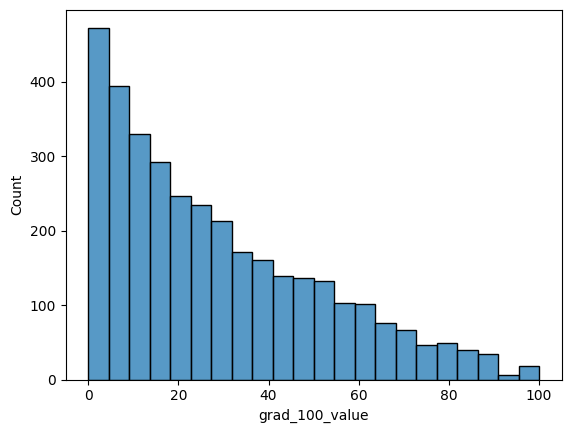

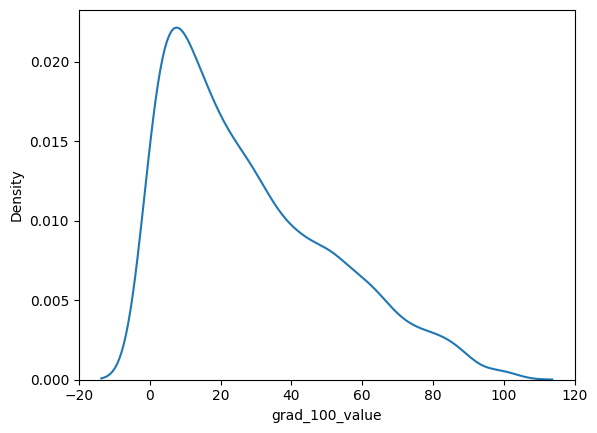

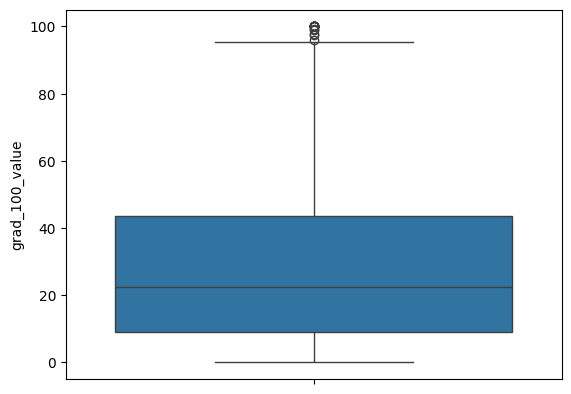

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [28]:
var = 'grad_100_value'
sns.histplot(df[var])
plt.show()

sns.kdeplot(df[var])
plt.show()

sns.boxplot(df[var])
plt.show()

print(df['grad_100_value'].describe())

5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

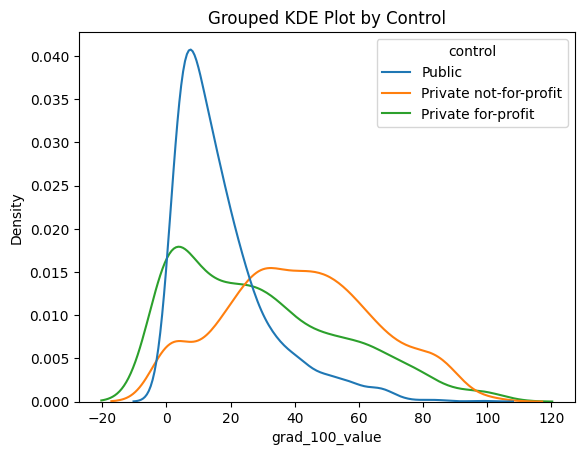

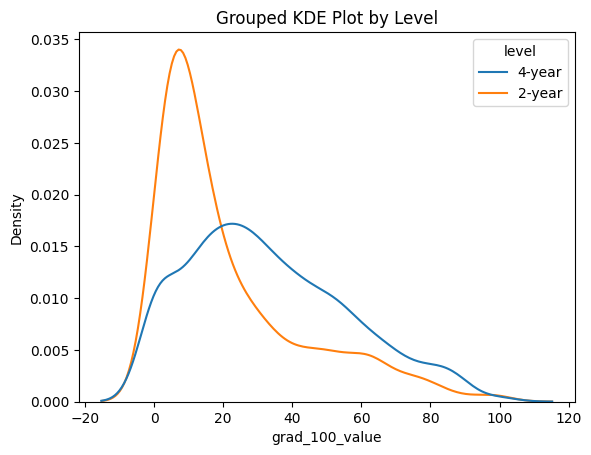

In [30]:
# Grouped KDE plot by control
var = 'grad_100_value'

sns.kdeplot(data=df, x=var, hue='control', common_norm=False)
plt.title('Grouped KDE Plot by Control')
plt.show()

# Grouped KDE plot by level
sns.kdeplot(data=df, x=var, hue='level', common_norm=False)
plt.title('Grouped KDE Plot by Level')
plt.show()

In [31]:
var = 'grad_100_value'
group = 'level'
df.loc[:,[group,var]].groupby(group).describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [32]:
var = 'grad_100_value'
group = 'control'
df.loc[:,[group,var]].groupby(group).describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

*The private not-for-profit universities have the highest average graduation rates and the 4-year institutions are also highest average grad rates*

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

In [35]:
df['levelXcontrol'] = df['level'] + ' ' + df['control']

[Text(0.5, 1.0, 'Grouped KDE Plot')]

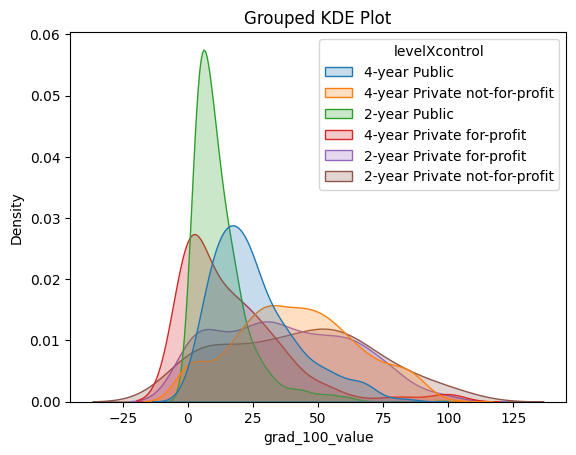

In [36]:
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol',fill=True, common_norm=False).set(title='Grouped KDE Plot')

*I am a bit confused on how to read this, but I think that 2-year Private not-for-profit is shown to have the highest graduation rates.*

7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

[Text(0.5, 1.0, 'Aid_Value KDE Plot by Level and Control')]

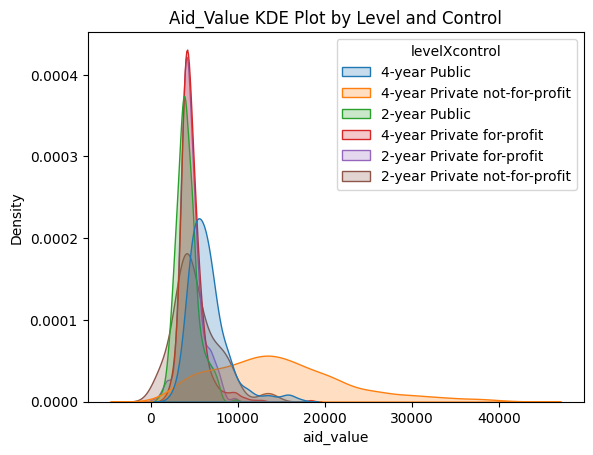

In [37]:
sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol',fill=True,common_norm=False).set(title='Aid_Value KDE Plot by Level and Control')

In [38]:
var = 'aid_value'
group = 'levelXcontrol'
df.loc[:,[group,var]].groupby(group).describe()

aid_value                                     \
                                  count          mean          std     min   
levelXcontrol                                                                
2-year Private for-profit         464.0   4559.681034  1286.688269   294.0   
2-year Private not-for-profit      68.0   5128.058824  2590.449946   934.0   
2-year Public                     926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit         527.0   4696.062619  1489.410020  1580.0   
4-year Private not-for-profit    1180.0  14702.401695  7649.775203   902.0   
4-year Public                     632.0   6514.071203  2353.716693  2232.0   

                                                                    
                                   25%      50%       75%      max  
levelXcontrol                                                       
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
2-year Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
2-year Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
4-year Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
4-year Public                  4990.50   6085.0   7341.50  17299.0

*4-year Private not-for-profit makes by far the most in aid on average with the other types being similar in average aid. This would make sense because people would likely be more inclined to donate to schools that aren't for profit, but that they still feel will do a good job at educating*

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

[Text(0.5, 1.0, 'Scatterplot of grad_100_value by aid_value')]

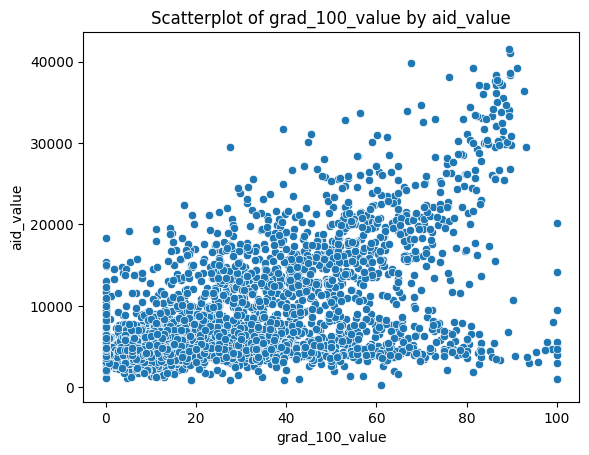

In [40]:
sns.scatterplot(data=df, x='grad_100_value',y='aid_value').set(title='Scatterplot of grad_100_value by aid_value')

[Text(0.5, 1.0, 'Scatterplot of grad_100_value by aid_value')]

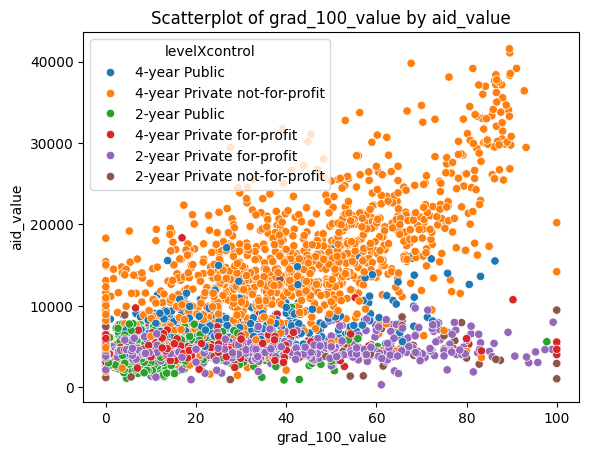

In [41]:
sns.scatterplot(data=df, x='grad_100_value',y='aid_value', hue='levelXcontrol').set(title='Scatterplot of grad_100_value by aid_value')

*I see that aid is much higher for the 4-year Private-not-for-profit schools. It seems that graduation rates increase with greater aid for 4-year Private not-for-profit schools the most as there seems to be a positive linear trend. Thsi trend occurs also with 4-year public, but not as much*

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see? 

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.